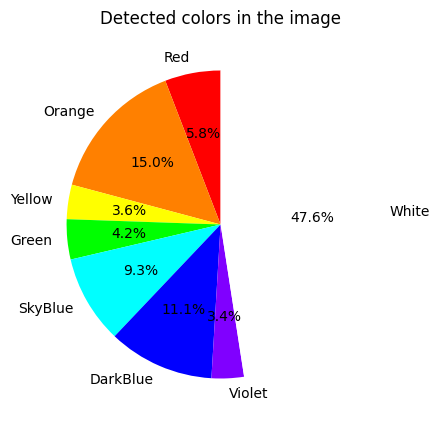

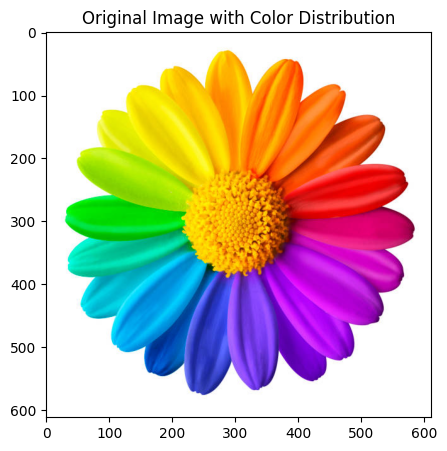

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load image
img = cv2.imread('istockphoto.jpg')

# Convert BGR to HSV (better for clustering colors based on hue)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Hue values are in the range [0, 179] in OpenCV for HSV
color_ranges = {
    'Red': [(0, 10), (170, 180)],  # Red hue range (0-10 and 170-180)
    'Orange': [(10, 30)],  # Orange hue range (10-30)
    'Yellow': [(30, 50)],  # Yellow hue range (30-50)
    'Green': [(50, 90)],  # Green hue range (50-90)
    'SkyBlue': [(90, 130)],  # SkyBlue hue range (90-130)
    'DarkBlue': [(130, 170)],  # DarkBlue hue range (130-170)
    'Violet': [(150, 170)],  # Violet hue range (150-170)
    'White': [(0, 179)]  # White hue range (whole hue spectrum with high value and low saturation)
}

# Function to create masks for each color
def get_color_mask(hsv_image, color_range):
    masks = []
    for lower, upper in color_range:
        lower_bound = np.array([lower, 50, 50])  # Hue lower bound, Saturation and Value thresholds
        upper_bound = np.array([upper, 255, 255])  # Hue upper bound, Saturation and Value thresholds
        mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
        masks.append(mask)
    return np.sum(np.array(masks), axis=0).astype(np.uint8) 

# Initialize a mask to keep track of which pixels have already been counted
final_labels = []
final_percentages = []
color_map = {
    'Red': [1, 0, 0],
    'Orange': [1, 0.5, 0],
    'Yellow': [1, 1, 0],
    'Green': [0, 1, 0],
    'SkyBlue': [0, 1, 1],
    'DarkBlue': [0, 0, 1],
    'Violet': [0.5, 0, 1],
    'White': [1, 1, 1]
}

# Create an empty mask to store the overall color distribution
color_mask_combined = np.zeros((img_hsv.shape[0], img_hsv.shape[1]), dtype=np.uint8)

# Create a mask for each color and calculate the percentage of pixels belonging to each color
total_pixels = img_hsv.shape[0] * img_hsv.shape[1]

for color_name, ranges in color_ranges.items():
    color_mask = get_color_mask(img_hsv, ranges)  # Get the mask for this color
    unique_color_pixels = cv2.countNonZero(color_mask)
    percentage = unique_color_pixels / total_pixels  # Percentage of pixels for this color
    
    # Only add the color if it is detected and it's not already counted in the combined mask
    if unique_color_pixels > 0:
        final_labels.append(color_name)
        final_percentages.append(percentage)
        
        # Mark the color pixels as part of the combined mask
        color_mask_combined = np.bitwise_or(color_mask_combined, color_mask)  # Bitwise OR to avoid overlapping counting

# Create the pie chart using the color_map
final_colors_for_pie = [color_map[color] for color in final_labels]

# Plot the pie chart with better visuals
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(final_percentages, colors=final_colors_for_pie, labels=final_labels, autopct='%1.1f%%', startangle=90)
ax.set_title("Detected colors in the image")

# Show the image with the color distribution
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('on')  # Show axes
plt.title("Original Image with Color Distribution")
plt.grid(False)
plt.show()
